In [1]:
import pandas as pd

## Pandas

### DataFrame
We can think of Pandas as dictionary of series. Let's see an example of how we construct a DataFrame using equal-length lists or arrays

In [3]:
dat = {'district': ['Makati', 'BGC', 'Ayala', 'Cebu', 'Davao'], 
      'year': [2001,2002,2003,2006,2007], 
      'population': [1.2, 2.3, 4.2, .8, 1.6]}

df = pd.DataFrame(dat)
df

,district,population,year
0,Makati,1.2,2001
1,BGC,2.3,2002
2,Ayala,4.2,2003
3,Cebu,0.8,2006
4,Davao,1.6,2007


In [4]:
# we want to know the column names
df.columns

Index(['district', 'population', 'year'], dtype='object')

There are two ways of accessing an entire column:
* df[ 'pop' ]
* df.pop

In [5]:
df.population
# df['population']

0    1.2
1    2.3
2    4.2
3    0.8
4    1.6
Name: population, dtype: float64

In [6]:
#create another column:
car = pd.Series([1.3, 2.3, 4.5]) #from Series
df['cars'] = car
df

#later on we will try to derived new column based on a calculation

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


### Reindexing


In [6]:
obj = pd.Series([4.5, 3.2, -5.6, 2.5], index = ['d', 'a', 'c', 'b'])
obj

d    4.5
a    3.2
c   -5.6
b    2.5
dtype: float64

In [7]:
obj.reindex(['a','b', 'c', 'd', 'e'])

a    3.2
b    2.5
c   -5.6
d    4.5
e    NaN
dtype: float64

notice that when we reindex, the values are arranged

### How to index / subset DataFrame?
* iloc
* loc
* ix
* masking

### df.iloc 
Implicit location

df.iloc[row,column]

In [9]:
df.iloc[2,3] #index 2 row, index 3 column

4.5

In [10]:
df.iloc[:2,:] #First two records

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3


In [11]:
df.iloc[:,:2] #First 2 columns

,district,population
0,Makati,1.2
1,BGC,2.3
2,Ayala,4.2
3,Cebu,0.8
4,Davao,1.6


In [7]:
df.iloc[-1:,:] # last record 

,district,population,year,cars
4,Davao,1.6,2007,NaN


In [8]:
df.iloc[:,-1:] #last column

,cars
0,1.3
1,2.3
2,4.5
3,NaN
4,NaN


### df.loc 
Explicit location

df.loc[row_index,column_index]

In [14]:
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


In [12]:
df.loc[0:2,'population':]

,population,year,cars
0,1.2,2001,1.3
1,2.3,2002,2.3
2,4.2,2003,4.5


In [16]:
df.loc[1,2] #This will generate an error!

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [14]:
#if you also want to rename the indices

df.index = ['a','b','c','d','e']
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


### df.ix 
Explicit-Implicit location

df.ix[row,column]

In [18]:
df.iloc['c','cars'] #This will generate an error since the indexers are explicit

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
df.ix['c',0:4] #sample of an Explicit-Impplicit Slice

In [18]:
#we can also used multiple index to slice
df.ix[['c','e'],0:4]

,district,population,year,cars
c,Ayala,4.2,2003,4.5
e,Davao,1.6,2007,NaN


In [20]:
df.ix[2,'cars']

4.5

In [21]:
df.ix['d',2]

2006

In [22]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [23]:
df['district'] #call one column

a    Makati
b       BGC
c     Ayala
d      Cebu
e     Davao
Name: district, dtype: object

In [24]:
# call multiple columns
# subset with a list[]
df[['population', 'cars']]



,population,cars
a,1.2,1.3
b,2.3,2.3
c,4.2,4.5
d,0.8,NaN
e,1.6,NaN


### Masking
slicing data based on some criteria

In [24]:
#Masking based on a condition
df[df['population'] > 2]

,district,population,year,cars
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5


In [25]:
#Masking based on multiple conditions
#year greater or equal to 2003 and population less than 2 M
df[(df['year'] >= 2003) & (df['population'] < 2)]

,district,population,year,cars
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


take note of the boolean operators '&' for intersection '|' for union

### Sorting
*  df.sort_values(by='col_name', ascending = True)

In [26]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [27]:
df.sort_values(by = 'district')


,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3


In [28]:
df.sort_values(by = 'population', ascending = False)

,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3
d,Cebu,0.8,2006,NaN


### Summarizing and Computing Descriptive stats

In [29]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [30]:
df.describe()

,population,year,cars
count,5.000000,5.000000,3.000000
mean,2.020000,2003.800000,2.700000
std,1.338656,2.588436,1.637071
min,0.800000,2001.000000,1.300000
25%,1.200000,2002.000000,1.800000
50%,1.600000,2003.000000,2.300000
75%,2.300000,2006.000000,3.400000
max,4.200000,2007.000000,4.500000


In [31]:
df.sum(axis = 1)

a    2003.5
b    2006.6
c    2011.7
d    2006.8
e    2008.6
dtype: float64

In [32]:
#let's try to calculate mean of cars column
print('mean of num of cars is:',df.cars.mean())

mean of num of cars is: 2.6999999999999997


In [33]:
#Let's try to calculate standard deviation of population
print('std dev of population is:',df.population.std())

std dev of population is: 1.3386560424545209


### Handling Missing Values
* dropna
* fillna
* isnull
* notnull

In [90]:
import numpy as np

s = pd.Series(['a', np.nan, 1, 2.3])

In [91]:
#detect which part of the series is null
s.isnull()

0    False
1     True
2    False
3    False
dtype: bool

In [92]:
#Determine if an element is Nan

s.isnull().values.any()

True

In [93]:
#We cn drop NA
s.dropna()


0      a
2      1
3    2.3
dtype: object

In [94]:
#back to our df
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


What if we want to impute for Nan Values?

In [95]:
#or we can impute them
df2 = df.fillna(df.cars.mean())
df2

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,2.7
e,Davao,1.6,2007,2.7


### Loading Data
* read_csv
* read_txt
* read_table

### Outputting Data

In [102]:
#Say we want to save df2 as csv file in or local drive:

#df2.to_csv(r'G:/Home/NSW_Home/200583/Profile/Documents/Python Scripts/'+'df2.csv')

## Merging Datasets
* pandas.merge - merge using SQL Like commands
* pandas.concat - stack Dfs along a certain axis

In [103]:
# a displayer function borrowed from JakeDave
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [104]:
df1 = pd.DataFrame({'Policy_Holder': ['001', '023', '054', '120', '032'],
                    'Policy_Typ': ['Home & Contents', 'Property', 'Motor', 'Motor', 'Workers_comp']})
df2 = pd.DataFrame({'Pol_H': ['001', '023', '054', '120', '032'],
                    'Inc_date': [2004, 2008, 2012, 2014, 2012]})
display('df1', 'df2')

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


### Merge

Say we want to get the inception date in df2 table by joining these datasets

In [105]:
df_join = pd.merge(df1, df2, left_on = 'Policy_Holder', right_on = 'Pol_H', how = 'left')

#if you don't specify, it will automatically find common key and join on that key
#in our example, we specify the left and right keys

display('df1', 'df2', 'df_join')



,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


### Concatenating

Most of the time we need to stack datasets. we can specify the axis of concatenation:

* axis = 1 means along columns
* axis = 0 means along rows

Let's see how this is done in numpy arrays first

In [107]:
import numpy as np
my_array = np.arange(20).reshape(4,5)
my_array


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [108]:
np.concatenate([my_array, my_array], axis = 0) #try axis = 1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### pd.concat( [ list_of_items ] )

fells like rbind or cbind in R

In [109]:
pd.concat([df1,df1], axis = 0,) #try ignore_index = True

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp


### Excercise

1. Download Data from:

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

2. Task: Rank US States and territories by their 2010 population

### Let's try Getting Data and Computing Correlationbetween two stocks

Get data first from Google Finance Stock prices and volumes

In [74]:
import pandas_datareader.data as web


apple = web.DataReader("AAPL", 'google', '1/1/2006', '1/1/2016')
microsoft = web.DataReader("MSFT", 'google', '1/1/2006', '1/1/2016')

In [80]:
print(apple.head())
print(microsoft.head())

             Open   High    Low  Close     Volume
Date                                             
2006-01-03  10.34  10.68  10.32  10.68  201853036
2006-01-04  10.73  10.85  10.64  10.71  155225609
2006-01-05  10.69  10.70  10.54  10.63  112396081
2006-01-06  10.75  10.96  10.65  10.90  176139334
2006-01-09  10.96  11.03  10.82  10.86  168861224
             Open   High    Low  Close     Volume
Date                                             
2006-01-03  26.25  27.00  26.10  26.84   79974418
2006-01-04  26.77  27.08  26.77  26.97   57975661
2006-01-05  26.96  27.13  26.91  26.99   48247610
2006-01-06  26.89  27.00  26.49  26.91  100969092
2006-01-09  26.93  27.07  26.76  26.86   55627836


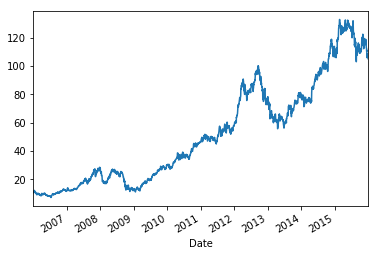

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
apple.Close.plot()

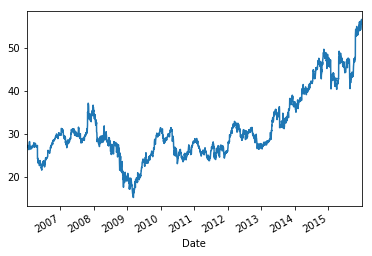

In [78]:
microsoft.Close.plot()

In [83]:
dat = pd.concat({'apple_close' : apple['Close'],'msft_close' : microsoft['Close']}, axis = 1)
dat.head()

,apple_close,msft_close
Date,,
2006-01-03,10.68,26.84
2006-01-04,10.71,26.97
2006-01-05,10.63,26.99
2006-01-06,10.90,26.91
2006-01-09,10.86,26.86


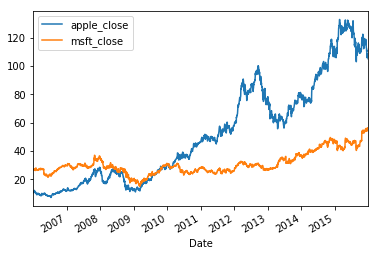

In [84]:
dat.plot()

### Correlation between two dataframe columns

In [85]:
dat['apple_close'].corr(dat['msft_close'])

0.79949501653802868

### Group By: The Split - Apply - Combine principle

* **Split** - break up and group a dataframe based on a specified key
* **Apply** - evaluate some function per split
* **Combine** - Merge back the splitted data with the applied function

In [110]:
#Lets see some example:
df = pd.DataFrame({'div': ['AO', 'GO', 'EM', 'AO', 'GO', 'EM'],
                   'data': range(1,7)}, columns=['div', 'data'])
df

,div,data
0,AO,1
1,GO,2
2,EM,3
3,AO,4
4,GO,5
5,EM,6


In [111]:
#groupby object
df.groupby('div')

#doesn't calculate yet until aggregation

In [112]:
AO = df[df['div']=='AO'].copy()
GO = df[df['div']=='GO'].copy()
EM = df[df['div']=='EM'].copy()
display('AO', 'GO', 'EM')

,div,data
0,AO,1
3,AO,4
,div,data
1,GO,2
4,GO,5
,div,data
2,EM,3
5,EM,6


data is split first accordingly

In [113]:
df.groupby('div').sum()

,data
div,
AO,5
EM,9
GO,7


after splitting, the function is applied and then the results are combined

Some Aggregate functions:

    count(), first(), last(), mean(), median(), min(), max(), std(), var(), prod(), sum()

### Now we apply groupby into real world data

Credit data set from Introduction to Statistical Learning

http://www-bcf.usc.edu/~gareth/ISL/data.html

* balance(average credit card debt for a number of individuals)
* age
* cards (number of credit cards)
* education(years of education)
* income (in thousands of dollars)
* limit (credit limit),
* rating (credit rating)

In [115]:
credit = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv')

In [116]:
credit.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [117]:
credit.rename(columns = {list(credit)[0]:'ID'}, inplace = True)

In [118]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
ID           400 non-null int64
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [119]:
#the groupby object
credit.groupby('Ethnicity')['Balance']

In [123]:
credit.groupby('Ethnicity')['Balance'].sum()

Ethnicity
African American     52569
Asian                52256
Caucasian           103181
Name: Balance, dtype: int64

In [124]:
credit.groupby('Gender')['Balance'].describe().unstack()

#What can we infer from these statistics?

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Male,193.0,509.803109,462.119644,0.0,5.0,463.0,815.0,1999.0
Female,207.0,529.536232,458.461672,0.0,92.0,456.0,887.0,1809.0


In [126]:
credit.groupby(['Gender', 'Ethnicity'])['Balance'].mean().unstack()


Ethnicity,African American,Asian,Caucasian
Gender,,,
Male,553.44898,452.872340,515.340206
Female,509.00000,563.109091,521.500000


We can use multi index or Multi column to summarise

In [127]:
credit.groupby(['Gender', 'Student'])['Limit','Balance' ].describe().unstack()

Limit                                                     \
                count         mean          std     min      25%     50%   
Gender Student                                                             
 Male  No       177.0  4695.689266  2383.857152   855.0  2955.00  4471.0   
       Yes       16.0  4906.500000  2140.616702   905.0  4146.50  4798.5   
Female No       183.0  4783.295082  2267.624218   855.0  3232.50  4779.0   
       Yes       24.0  4552.333333  2275.059649  1233.0  2861.75  4106.0   

                                 Balance                                       \
                    75%      max   count        mean         std   min    25%   
Gender Student                                                                  
 Male  No       5767.00  13913.0   177.0  470.757062  440.046863   0.0    0.0   
       Yes      6265.75   8376.0    16.0  941.750000  494.403007   0.0  725.5   
Female No       5852.00  13414.0   183.0  489.666667  439.808479   0.0   51.0   
       Yes      5835.00   9560.0    24.0  833.541667  492.776250  16.0  408.0   

                                         
                   50%      75%     max  
Gender Student                           
 Male  No        414.0   724.00  1999.0  
       Yes      1045.0  1282.25  1587.0  
Female No        429.0   843.50  1809.0  
       Yes       885.5  1242.25  1687.0

**Notice how huge is the average balance of students**

**df.groupby( 'column_to_group_by' )[ 'column_to_perform_function' ].function()**

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

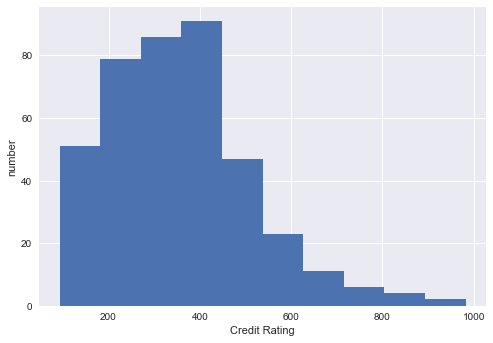

In [131]:
plt.hist(credit['Rating'])
plt.ylabel('number')
plt.xlabel('Credit Rating')

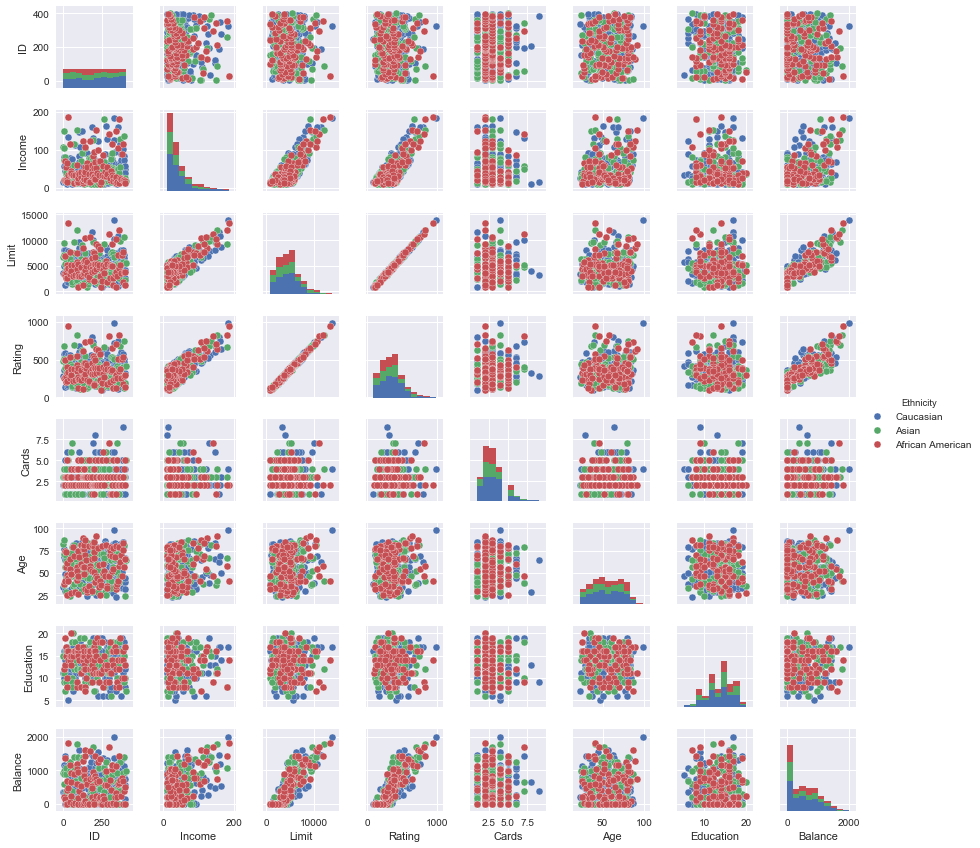

In [132]:
sns.pairplot(credit, hue = 'Ethnicity', size = 1.5)

### Pivot Tables
let's some try pivoting on a data set we will be getting from data.gov.ph

we might have network restriction at the office

In [133]:
RIT = pd.read_csv('http://storage.googleapis.com/amt-dgph.appspot.com/uploads/'+ \
                  'kn1XXP648jzKGXfh0nAS/pnp_motorcycle_riding_in_tandem_criminals_2011-2013.csv', low_memory = False)

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
RIT.head()

In [70]:
#Create a table of shooting_incidents per year by region
pd.pivot_table(RIT, index = 'police_regional_office', columns = 'year', values = 'shooting_incidents_killed')

DataError: No numeric types to aggregate

Ooops! There's an error!!!

Let's figure out what is the cause of error 

In [71]:
RIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 29 columns):
year                                  611 non-null int64
month                                 611 non-null object
police_regional_office                611 non-null object
shooting_incidents_killed             611 non-null object
shooting_incidents_wounded            611 non-null object
shooting_incidents_unharmed           611 non-null object
shooting_incidents_total              611 non-null object
robbery_killed                        611 non-null object
robbery_wounded                       611 non-null object
robbery_unharmed                      611 non-null object
robbery_total                         611 non-null object
carnapping_killed                     611 non-null object
carnapping_wounded                    611 non-null object
carnapping_unharmed                   611 non-null object
carnapping_total                      611 non-null object
others_killed             

In [58]:
#sub2 = RIT.iloc[:,3:].convert_objects(convert_numeric = True)
RIT['shooting_incidents_killed'] = pd.to_numeric(RIT['shooting_incidents_killed'], errors = 'coerce')

In [73]:
part1 = RIT.iloc[:,0:3]

In [74]:
#It seems that the numeric values are not in the correct data types, let's try to convert them

pd.to_numeric(RIT['shooting_incidents_killed'])

ValueError: Unable to parse string

**ANOTHER ERROR! Unable to Parse String!**

research how to fix this

In [63]:

#Let's transform these variables into numeric

part2 = RIT.iloc[:,3:].apply(lambda x: pd.to_numeric(x,errors = 'coerce'), axis = 0)
#apply functions apply a function across columns
#lambda Function: anonymous function
#to_numeric tries to convert an object into numeric
#axis = 0 means apply the function on each rows

In [65]:
part2.head()

,shooting_incidents_killed,shooting_incidents_wounded,shooting_incidents_unharmed,shooting_incidents_total,robbery_killed,robbery_wounded,robbery_unharmed,robbery_total,carnapping_killed,carnapping_wounded,...,victims_total,status_of_suspects_at-large,status_of_suspects_arrested,status_of_suspects_killed,status_of_suspects_total,status_of_case_under_investigation,status_of_case_referred_to_pros,status_of_case_filed_in_court,status_of_case_no_case_filed,total_number_of_incidents
0,12.0,5.0,1.0,14.0,0.0,0.0,1.0,1.0,0.0,0.0,...,20.0,28.0,1.0,0.0,29.0,8.0,9.0,0.0,0.0,17.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2,9.0,5.0,0.0,12.0,0.0,0.0,15.0,15.0,0.0,0.0,...,29.0,54.0,0.0,0.0,54.0,21.0,6.0,0.0,0.0,27.0
3,7.0,6.0,2.0,15.0,0.0,0.0,17.0,17.0,0.0,1.0,...,33.0,68.0,0.0,0.0,68.0,21.0,9.0,3.0,0.0,33.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN


**Let's recombine these parts. What shall we use?**

In [80]:
RIT = pd.concat([part1, part2], axis = 1)

In [81]:
#Let's try to pivot again
pd.pivot_table(RIT, index = 'police_regional_office', columns = 'year', values = 'shooting_incidents_killed')

year,2011,2012,2013
police_regional_office,,,
1,5.250000,6.916667,9.500000
10,0.083333,5.916667,5.000000
11,10.250000,10.250000,10.666667
12,2.833333,5.583333,7.000000
13,0.500000,3.636364,3.083333
2,1.916667,2.454545,1.666667
3,16.750000,8.083333,11.083333
4A,9.500000,14.416667,9.250000
4B,0.166667,0.916667,1.500000


In [82]:
RIT.isnull().values.any()

True

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

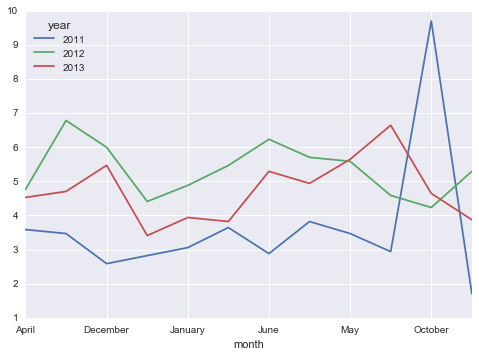

In [88]:
pd.pivot_table(RIT, index = 'month', columns = 'year', values = 'shooting_incidents_killed').plot()

Excercises:

* https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb
* https://github.com/guipsamora/pandas_exercises
* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb
        

### A little bit of Scikit

* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb
* Introduction to Statistical Learning in R

In [24]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Features Matrix**
- a table that contains the variables, may come from a numpy array, a dataframe

**Target Array**
- the quantity we usually want to predict

**API Basics**

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
> For supervised learning, often we predict labels for unknown data using the predict() method.
> For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [134]:
Default = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv') 

In [135]:
Default.head() #Let's try to apply basic logistic regression to predict Rating

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [137]:
Default.shape

(10000, 5)

In [146]:
#recode dataset
#create dummies for categorical
#Default.drop(Default[Default.columns[0]])
Default_clean = pd.get_dummies(Default)
#
#Default_clean.head()


ValueError: labels [10000] not contained in axis

** 1.  Choose a class of Model**

In [101]:
from sklearn.linear_model import LinearRegression

In [75]:
LogisticRegression?

** 2. Choose Model HyperParameters**

in this example we will just select fit_intercept = True, to indicate we want to add the intercept in the logit function. Note that at this point we are not yet modelling, rather we are defining the class of the model

In [103]:
model = LinearRegression(fit_intercept = True, normalize = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

**3. Set up features matirx and Target Array **


In [104]:
#credit = credit.drop('ID', axis = 1)
credit.head(3)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [105]:
# SOme Variables are not numeric, and so we might need to create dummy variables for them:
credit_d1 = pd.get_dummies(credit)
credit_d1.head(3)

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,106.025,6645,483,3,82,15,903,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,104.593,7075,514,4,71,11,580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [106]:
y_credit = credit_d1['Rating'] #target array
X_credit = credit_d1.drop(['ID', 'Rating'], axis = 1) #Feature Matrix

In [107]:
X_credit.head(3)

,Income,Limit,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,2,34,11,333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,106.025,6645,3,82,15,903,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,104.593,7075,4,71,11,580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Split the data into train and test

In [108]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_credit , y_credit , random_state = 1)


In [53]:
train_test_split?

**4. FIt the model** 

In [109]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

**5. Apply the model and evaluate**

In [110]:
Y_pred = model.predict(Xtest)

In [112]:
Y_pred

array([ 199.41025725,  196.9756482 ,  281.45387887,  718.34016295,
        352.22221595,  246.2816563 ,  296.05731718,  286.89954378,
        416.26183498,  172.66770013,  755.36266965,  285.34731088,
        548.11442252,  224.43058591,  237.39920875,  413.11267832,
        187.9893667 ,  582.87220107,  484.44487719,  354.67662334,
        499.88764033,  117.82012663,  399.16918873,  386.59698084,
        328.84221694,  228.73127241,  567.06502156,  545.07231175,
        361.65408163,  345.63363809,  309.66023249,  359.79898108,
        346.02269166,  623.77467847,  257.31101452,  267.45489816,
        264.19072225,  543.48672829,  325.74514289,  738.50629895,
        137.09255371,  387.17547502,  313.63132737,  149.56506933,
        412.92720232,  855.57454769,  506.66559781,  296.99643177,
        655.73285797,  500.68896962,  320.14231557,  422.29460711,
        546.15014677,  456.64256299,  370.29089323,  137.42019343,
        278.48326835,  639.88836688,  206.3585935 ,  436.39724

In [114]:
params = pd.Series(model.coef_, index=Xtrain.columns)
params

Income                        0.170782
Limit                         0.061866
Cards                         4.516418
Age                           0.021597
Education                    -0.249599
Balance                       0.018900
Gender_ Male                  0.178602
Gender_Female                -0.178602
Student_No                    2.957951
Student_Yes                  -2.957951
Married_No                   -1.088847
Married_Yes                   1.088847
Ethnicity_African American    1.215586
Ethnicity_Asian              -0.902734
Ethnicity_Caucasian          -0.235547
dtype: float64

In [117]:
residue = pd.Series(model.residue_, index=Xtrain.columns)
residue

AttributeError: 'LinearRegression' object has no attribute 'residue_'